In [1]:
import openpyxl
import pandas as pd
from openpyxl.worksheet.worksheet import Worksheet

file_name = "synthtic_data_economy.xlsx"
workbook = openpyxl.load_workbook(file_name)


def extract_dataframes(ws: Worksheet, sheet_index: int, file_name: str):
    skip_index = 0
    for row_values in ws.iter_rows(values_only=True):
        if "Projekt" in row_values:
            break
        skip_index += 1

    # extract dataframe, and drop their last row, remove invalid rows, then set Projekt column as index
    return (
        pd.read_excel(file_name, sheet_name=sheet_index, skiprows=skip_index)[:-1]
        .dropna(subset=["Projekt"])
        .drop_duplicates(subset=["Projekt"])
        .set_index("Projekt")
    )


df_list = [
    extract_dataframes(ws, idx, file_name) for idx, ws in enumerate(workbook.worksheets)
]

In [2]:
def join_two_dataframe(
    df_1: pd.DataFrame, df_2: pd.DataFrame, diff_warning: dict | None = None
):
    merged = pd.merge(df_1, df_2, left_index=True, right_index=True, how='outer')
    if diff_warning is None:
        diff_warning = {}

    for col in df_1.columns.intersection(df_2.columns):
        filtered = merged[
            merged[f"{col}_x"].notna()
            & merged[f"{col}_y"].notna()
            & (merged[f"{col}_x"] != merged[f"{col}_y"])
        ]
        filtered = filtered[[f"{col}_x", f"{col}_y"]]
        for idx, data in filtered.iterrows():
            if idx not in diff_warning:
                diff_warning[idx] = {}
            if col not in diff_warning[idx]:
                diff_warning[idx][col] = set()

            diff_warning[idx][col].add(data[f"{col}_x"])
            diff_warning[idx][col].add(data[f"{col}_y"])

        merged[col] = merged[f"{col}_x"].combine_first(merged[f"{col}_y"])
        merged = merged.drop(columns=[f"{col}_x", f"{col}_y"])
    return diff_warning, merged


warning_dict = {}
warning_dict, merge = join_two_dataframe(df_list[0], df_list[1], warning_dict)
warning_dict, final_df = join_two_dataframe(merge, df_list[2], warning_dict)

In [3]:
final_df

,NodeCount,TempValue,SignalType,BatchID,CoreMass,DriftUnit,PhaseMark,LoadFactor,SpinRate,ByteSize,...,Phone,Status,Score,Rank,Category,Group,PROJL,AlphaRate,contract start,contract end
Projekt,,,,,,,,,,,,,,,,,,,,,
129384 Echo,0.593475,0.026066,0.587294,0.13088,0.968051,0.652980,0.721156,0.527590,0.821617,0.470008,...,0.622916,0.913294,0.796208,0.045070,0.073905,0.202641,Y1V9QX Giselle Monroe,0.047592,2022-02-20,2022-11-06
129384 Mirage,0.753423,0.041474,0.180145,0.727991,0.672977,0.400555,0.672916,0.056064,0.524642,0.719285,...,0.563563,0.313434,0.108427,0.454951,0.698175,0.953437,B4T1XJ Leo Sanderson,0.446357,2022-06-13,2021-04-27
174820 Timber,0.127023,0.627356,0.519903,0.968268,0.449957,0.218221,0.641078,0.814468,0.434505,0.718831,...,0.340259,0.927662,0.230093,0.278575,0.851496,0.37419,K2L9VX Dahlia West,0.698010,2020-08-08,2024-04-16
174820 Velvet,15.000000,21.100000,Analog,B-104,4.500000,0.002000,PM-5,1.700000,9900.000000,1024.000000,...,PM-5,1.700000,9900.000000,1024.000000,Mute,Low,ZQ7L8M Fiona Caldwell,0.920000,2021-10-29,2020-11-20
193840 Grove,0.627440,0.074619,0.010666,0.544729,0.509722,0.673407,0.635444,0.126386,0.450863,0.790412,...,0.486784,0.207643,0.634016,0.875867,0.219953,0.705255,G3T0KU Lila Emerson,0.720312,2024-02-25,2022-05-15
219384 Meadow,0.665218,0.038540,0.969371,0.189362,0.383145,0.877051,0.128821,0.062400,0.175613,0.508973,...,0.060894,0.763893,0.353532,0.970628,0.16177,0.425096,M7C1VE Natalie Brooks,0.944451,2023-11-21,2022-01-02
239481 Drift,0.275658,0.840530,0.959102,0.55095,0.084488,0.734854,0.537088,0.354807,0.261000,0.591925,...,0.041628,0.806101,0.533330,0.033466,0.66874,0.324343,S7N3QY Felix Durant,0.309166,2022-04-07,2022-03-02
283910 Glimmer,0.297243,0.168290,0.38084,0.334989,0.819494,0.527054,0.882539,0.670397,0.534469,0.569160,...,0.832095,0.133425,0.566546,0.899809,0.438685,0.955405,J3Y9PA Helena Cruz,0.391958,2024-10-19,2022-07-05
294183 Ripple,0.331534,0.820769,0.693332,0.07064,0.607100,0.513860,0.333513,0.280771,0.957074,0.377154,...,0.506472,0.256127,0.522289,0.748521,0.677663,0.63133,Q9M7ZL Tessa Vaughn,0.162803,2020-09-25,2023-10-02


In [4]:
final_df["name"] = final_df.index.str.split(" ", n=1).str[1]


In [5]:
corresponding_names_for_columns = {
    "contract start": "start",
    "contract end": "end",
    "Unit  ": "budget",
    "name": "project"
}

budget_df = final_df[corresponding_names_for_columns.keys()].copy()
budget_df.rename(columns=corresponding_names_for_columns, inplace=True)
budget_df

,start,end,budget,project
Projekt,,,,
129384 Echo,2022-02-20,2022-11-06,0.006189,Echo
129384 Mirage,2022-06-13,2021-04-27,0.579054,Mirage
174820 Timber,2020-08-08,2024-04-16,NaN,Timber
174820 Velvet,2021-10-29,2020-11-20,15.000000,Velvet
193840 Grove,2024-02-25,2022-05-15,0.859572,Grove
219384 Meadow,2023-11-21,2022-01-02,0.075236,Meadow
239481 Drift,2022-04-07,2022-03-02,0.560028,Drift
283910 Glimmer,2024-10-19,2022-07-05,0.223435,Glimmer
294183 Ripple,2020-09-25,2023-10-02,0.964130,Ripple


In [6]:
import numpy as np

budget_df["start"] = pd.to_datetime(budget_df["start"])
budget_df["end"] = pd.to_datetime(budget_df["end"])
budget_df["duration"] = budget_df["end"] - budget_df["start"]

# remove invalid date and times
budget_df = budget_df[budget_df["duration"] > np.timedelta64(0)]

# remove null budgets
budget_df = budget_df[budget_df["budget"].notna()]


In [7]:
from typing import Literal
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib.collections import PolyCollection
import matplotlib.dates as mdates
import pandas as pd


def get_block_intervals(
    poly: PolyCollection, check_overlap: bool = True
) -> tuple[list[tuple[int, int]], np.ndarray, np.ndarray]:
    """Get continuous intervals from polygon collection boundaries.

    This function analyzes a polygon collection to identify continuous intervals where the
    boundaries form connected blocks. It splits the polygon vertices into top and bottom
    boundaries and finds intervals where the boundaries maintain continuity.

    Args:
        poly (PolyCollection): The polygon collection to analyze.
        check_overlap (bool, optional): Whether to check for overlapping between adjacent blocks.
            Defaults to True.

    Returns:
        tuple: A tuple containing:
            - list of tuples: Each tuple contains (start, end) indices of continuous intervals
            - ndarray: Top boundary vertices
            - ndarray: Bottom boundary vertices

    Notes:
        The function assumes the polygon collection contains a single path.
        Intervals are determined based on:
        1. Changes in data between adjacent points
        2. Non-zero height bars
        3. Lack of overlap between adjacent bars (if check_overlap=True)
    """
    path = poly.get_paths()[0]  # usually only one path per layer
    verts = path.vertices
    n = len(verts) // 2
    if len(verts) % 2 != 0:
        verts = np.delete(verts, n, axis=0)

    # Split into top and bottom boundaries
    bottom = verts[:n]
    top = verts[n:][::-1]  # reverse top so it aligns with bottom

    intervals = []
    start = end = -1
    for idx, (t, b) in enumerate(zip(top[:, 1], bottom[:, 1])):
        if idx < len(bottom) - 1:
            next_t, next_b = top[idx + 1, 1], bottom[idx + 1, 1]
        else:
            next_t, next_b = -1, -1
        end += 1

        # conditions for restarting interval are as bellow.
        # 1- data will be changed in next iteration.
        # 2- current bar or next bar is not 0.
        # 3- there is not any overlap between current bar and next bar.

        # XXX: Adding a tolerance factor for overlap could be good idea.
        # like setting a condition to restart interval only if overlap
        # area is less than 50%.
        condition = ((next_t != t) or (next_b != b)) and (
            ((next_t - next_b) > 0) or ((t - b) > 0)
        )
        if check_overlap:
            condition = condition and (not (next_b < t and b < next_t))

        if condition:
            if start != -1:
                intervals.append((start + 1, end + 1))
            start = end = idx
    return intervals, top, bottom


def get_block_centers(poly: PolyCollection) -> list:
    """
    Calculate the center coordinates of each block in a polygon collection.

    Args:
        poly (PolyCollection): A matplotlib PolyCollection object representing multiple polygons.

    Returns:
        list: A list of tuples containing (x, y) coordinates for the center of each block.
              Each center is calculated by averaging x coordinates of bottom vertices and
              taking the midpoint between top and bottom y coordinates.
    """
    intervals, top, bottom = get_block_intervals(poly)
    centers = []
    for from_, to_ in intervals:
        avg_x = np.average(bottom[from_:to_, 0])
        avg_y = np.average(
            bottom[from_:to_, 1] + ((top[from_:to_, 1] - bottom[from_:to_, 1]) / 2)
        )
        centers.append((avg_x, avg_y))

    return centers


def get_budget_stack_data(
    df: pd.DataFrame,
    priority_type: Literal["budget", "start", "duration"],
    priority_ascending: bool,
    label_column="project",
):
    """Calculate stacked budget data for visualization.

    Args:
        df: DataFrame containing project data
        priority_type: Column name to use for prioritizing/ordering the stacks.
        priority_ascending: If True, sort priority in ascending order.

    Returns:
        tuple: A tuple containing:
            - x: numpy array of datetime64 values representing time points
            - y: numpy array of stacked budget values, shaped (n_projects, n_timepoints)
            - labels: list of project names in their priority order
    """
    edges = sorted(set(df["start"]).union(set(df["end"])))
    values = {name: [0] * len(edges) for name in df[label_column]}

    for i, edge in enumerate(edges):
        active_records = df[(df["start"] <= edge) & (df["end"] > edge)]
        for _, record in active_records.iterrows():
            values[record[label_column]][i] = record["budget"]

    x = np.array(edges, dtype="datetime64")
    priority = df.sort_values(by=priority_type, ascending=priority_ascending)[
        label_column
    ].tolist()
    y_priority = np.vstack([values[name] for name in priority])
    return x, y_priority, priority


def plot_budget(ax, plot_today, x, y, labels):
    now = datetime.now()

    if not ax:
        _, ax = plt.subplots(figsize=(8, 4))

    # plot bars
    polys = ax.stackplot(x, y, labels=labels, baseline="zero", step="post")

    # plot today
    if plot_today:
        ax.axvline(
            x=now,
            color="black",
            label=f"today ({now.strftime('%Y-%m-%d')})",
            linestyle="dashed",
        )

    # set bars' label on them
    for poly in polys:
        centers = get_block_centers(poly)
        for x, y in centers:
            ax.text(
                x,
                y,
                poly.get_label(),
                horizontalalignment="center",
                verticalalignment="center",
            )

    ax.legend()
    return ax, polys


def plot_projects_budget(
    projects_df: pd.DataFrame,
    priority_type: Literal["budget", "start", "duration"],
    priority_ascending: bool,
    ax: plt.Axes = None,
    plot_today: bool = True,
):
    x, y, labels = get_budget_stack_data(
        projects_df, priority_type, priority_ascending, "project"
    )
    ax, polys = plot_budget(ax, plot_today, x, y, labels)
    return ax, polys


def plot_work_package_budget(
    work_packages_df: pd.DataFrame,
    priority_type: Literal["budget", "start", "duration"],
    priority_ascending: bool,
    ax: plt.Axes = None,
    plot_today: bool = True,
):
    x, y, labels = get_budget_stack_data(
        work_packages_df, priority_type, priority_ascending, "id"
    )
    labels = ["WP-" + str(label) for label in labels]
    ax, polys = plot_budget(ax, plot_today, x, y, labels)
    return ax, polys


def plot_projects_budget_cumsum(
    df: pd.DataFrame, ax: plt.Axes = None, plot_today: bool = True
):
    start_budget_map = df.groupby("start")["budget"].sum().to_dict()
    end_budget_map = df.groupby("end")["budget"].sum().to_dict()
    edges = sorted(set(df["start"]).union(set(df["end"])))

    values = []
    sum = 0
    for edge in edges:
        if edge in start_budget_map:
            sum += start_budget_map[edge]
        if edge in end_budget_map:
            sum -= end_budget_map[edge]
        values.append(sum)
    values.pop()
    if not ax:
        _, ax = plt.subplots(figsize=(8, 4))
    now = datetime.now()

    ax.stairs(values, edges, label="budget chart", color="tab:blue")
    if plot_today:
        ax.axvline(
            x=now,
            color="black",
            label=f"today ({now.strftime('%Y-%m-%d')})",
            linestyle="dashed",
        )

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=60)
    ax.legend()
    return ax


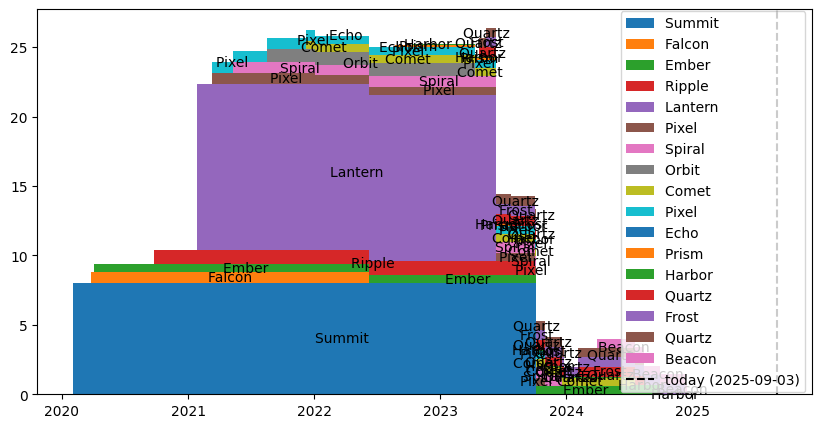

In [8]:
priority_type = "start"   # choices are budget - start - duration
priority_ascending = True # choices are False - True
fig, ax = plt.subplots(figsize=(10, 5))

ax = plot_projects_budget(budget_df, priority_type, priority_ascending,ax=ax)
plt.show()

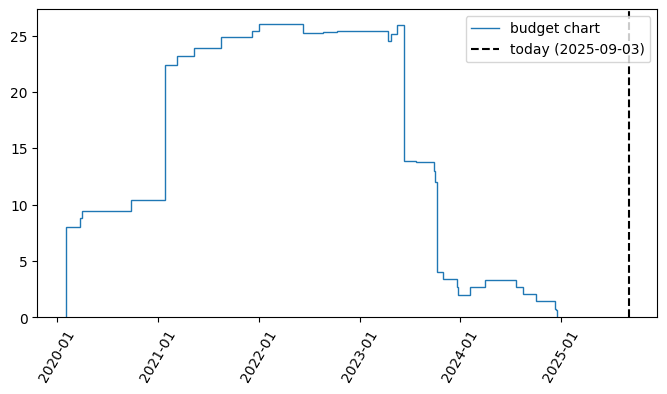

In [9]:
plot_projects_budget_cumsum(budget_df)
plt.show()